# LAND LEASE PRICE RECOMMENDER

In [1]:
# OVERVIEW - there are two base_state_price_per_acre lists, one for properties under 100 acres, one for properties > 100 acres
# Properties under 100 acres are cheaper so that they appeal to more lower income, individual hunters. The minimum annual property cost is $300. 

### Import dependencies

In [33]:
#import libraries
import pandas as pd 
import numpy as np
import random
import math
pd.options.mode.chained_assignment = None  # default='warn'
#import source data
url_1 = 'https://raw.githubusercontent.com/PhilipHarvey20/Land-Lease-Price-Generator/master/acreage_price_by_state.csv'
df = pd.read_csv(url_1)

In [34]:
df.head(3)

,STATE,BASE_STATE_PRC_HUNTING,BASE_STATE_PRC_HUNTING_OVER_100_ACRES
0,Illinois,29,29
1,Oregon,10,22
2,Iowa,35,35


### Create dataframe

In [35]:
# Create list of 50 unique states from the imported csv
STATE_LIST = df['STATE'].to_list()
# Create state price per acre lookup to join onto dataframe later
STATE_PRC_PER_ACRE_LOOKUP = df.drop_duplicates()
# Generate dataframe of 10k random states with base acreage price per state
random_list_10k_states = [STATE_LIST[random.randrange(len(STATE_LIST))] for i in range(10000)]
df = pd.DataFrame(random_list_10k_states, columns = ['STATE'])

In [36]:
df.shape

(10000, 1)

In [37]:
cols = ['STATE']
df = df.join(STATE_PRC_PER_ACRE_LOOKUP.set_index(cols), on=cols)
df.shape

(10000, 3)

In [38]:
df.shape

(10000, 3)

In [39]:
df.head(30)

,STATE,BASE_STATE_PRC_HUNTING,BASE_STATE_PRC_HUNTING_OVER_100_ACRES
0,Arizona,10,22
1,West Virginia,11,23
2,Iowa,35,35
3,Idaho,10,22
4,Wisconsin,29,29
5,Texas,10,22
6,Louisiana,10,22
7,Montana,10,22
8,Vermont,10,22
9,Hawaii,10,22


### Populate df with activity type, acreage, duration, and price

In [40]:
# Randomly populate acreages 
df['ACREAGE'] = np.random.randint(1, 1000, df.shape[0])

# Randomly generate duration (i.e. # of days rented)
df['DURATION_days'] = np.random.randint(1, 365, df.shape[0])

# 1) Calculating total annual price

In [41]:
def acreage_based_price(TOTAL_ANNUAL_PRICE_less_100_acres, TOTAL_ANNUAL_PRICE_greater_100_acres, BASE_STATE_PRC_HUNTING, ACREAGE):
    TOTAL_ANNUAL_PRICE_less_100_acres = np.sqrt(BASE_STATE_PRC_HUNTING * ACREAGE) * 35
    TOTAL_ANNUAL_PRICE_greater_100_acres = np.sqrt(BASE_STATE_PRC_HUNTING_OVER_100_ACRES * ACREAGE) * 41
    if ACREAGE < 100:
        TOTAL_ANNUAL_PRICE = TOTAL_ANNUAL_PRICE_less_100_acres

In [ ]:
df['FINAL_PRICE'] = df.apply(lambda x: final_price(x['DURATION_days'], x['TOTAL_ANNUAL_PRICE'], x['ACREAGE']), axis=1)

In [12]:
# THE BLOCK BELOW IS INSIDE THE ABOVE FUNCTION
# total price for plots less than 100 acres
df['TOTAL_ANNUAL_PRICE_less_100_acres'] = np.sqrt(df['BASE_STATE_PRC_HUNTING'] * df['ACREAGE']) * 35
# total price for plots greater than 100 acres
df['TOTAL_ANNUAL_PRICE_greater_100_acres'] = np.sqrt(df['BASE_STATE_PRC_HUNTING_OVER_100_ACRES'] * df['ACREAGE']) * 41

df.loc[df['ACREAGE'] < 100, 'TOTAL_ANNUAL_PRICE'] = df['TOTAL_ANNUAL_PRICE_less_100_acres']
# THE BLOCK ABOVE IS INSIDE the FUNCTION
df['TOTAL_ANNUAL_PRICE'].fillna(df['TOTAL_ANNUAL_PRICE_greater_100_acres'], inplace=True)
df.drop(['TOTAL_ANNUAL_PRICE_less_100_acres','TOTAL_ANNUAL_PRICE_greater_100_acres',],axis = 1, inplace = True)

### Set min annual total price to 1000

In [13]:
# Set the minimum daily acreage price to $60
df['TOTAL_ANNUAL_PRICE'] = np.where((df['ACTIVITY_TYPE']=='HUNTING') & (df['TOTAL_ANNUAL_PRICE']<1000), 1000, df['TOTAL_ANNUAL_PRICE']) 

### rearrange columns

In [14]:
df = df[['ACTIVITY_TYPE','BASE_STATE_PRC_HUNTING','BASE_STATE_PRC_HUNTING_OVER_100_ACRES', 'STATE',  'ACREAGE','DURATION_days', 'TOTAL_ANNUAL_PRICE']]

# Start here *** calculating price by duration

### set daily price

In [ ]:
df['DAILY_PRICE_BASE'] = df['TOTAL_ANNUAL_PRICE']/365

In [ ]:
df = df[['ACTIVITY_TYPE', 'BASE_STATE_PRC_HUNTING','BASE_STATE_PRC_HUNTING_OVER_100_ACRES', 'STATE', 'ACREAGE', 'DURATION_days', 'DAILY_PRICE_BASE','TOTAL_ANNUAL_PRICE']]

### duration groups

In [ ]:
# # final price for (total annual < 1k) & (acreage < 20)
# def duration_groups_less_20_acres(DURATION_days, TOTAL_ANNUAL_PRICE, ACREAGE):
#     if DURATION_days <= 5 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .05) * DURATION_days
#     if 5 < DURATION_days <= 10 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .04) * DURATION_days
#     if 10 < DURATION_days <= 30 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .03) * DURATION_days
#     if 30 < DURATION_days <= 60 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .02) * DURATION_days
#     if 60 < DURATION_days <= 120 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .01) * DURATION_days
#     if 120 < DURATION_days <= 365 and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .006) * DURATION_days
#     if 365 < DURATION_days and TOTAL_ANNUAL_PRICE <= 1000 and ACREAGE <= 20:
#         return (TOTAL_ANNUAL_PRICE * .004) * DURATION_days

# # final price for (total annual < 1k) & (acreage between 20 and 100)
# def duration_groups_20_to_100_(DURATION_days, TOTAL_ANNUAL_PRICE, ACREAGE):
#     if DURATION_days <= 5 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .05) * DURATION_days
#     if 5 < DURATION_days <= 10 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .04) * DURATION_days
#     if 10 < DURATION_days <= 30 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .038) * DURATION_days
#     if 30 < DURATION_days <= 60 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .02) * DURATION_days
#     if 60 < DURATION_days <= 120 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .015) * DURATION_days
#     if 120 < DURATION_days <= 365 and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .006) * DURATION_days
#     if 365 < DURATION_days and TOTAL_ANNUAL_PRICE <= 1000 and 20< ACREAGE <= 100:
#         return (TOTAL_ANNUAL_PRICE * .004) * DURATION_days

# # This is not working correctly
# def duration_groups_more_100_acres(DURATION_days, TOTAL_ANNUAL_PRICE, ACREAGE):
#     if DURATION_days <= 5 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .05) * DURATION_days
#     if 5 < DURATION_days <= 10 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .04) * DURATION_days
#     if 10 < DURATION_days <= 30 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .038) * DURATION_days
#     if 30 < DURATION_days <= 60 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .02) * DURATION_days
#     if 60 < DURATION_days <= 120 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .010) * DURATION_days
#     if 120 < DURATION_days <= 365 and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .004) * DURATION_days
#     if 365 < DURATION_days and ACREAGE > 100:
#         return (TOTAL_ANNUAL_PRICE * .002) * DURATION_days

# Final Price Function

In [ ]:
# This is working with no gaps, just need to validate final prices to see if they look good
def final_price(DURATION_days, TOTAL_ANNUAL_PRICE, ACREAGE):
    if DURATION_days <= 5:
        return (TOTAL_ANNUAL_PRICE * .05) * DURATION_days
    if 5 < DURATION_days <= 10:
        return (TOTAL_ANNUAL_PRICE * .04) * DURATION_days
    
    if 10 < DURATION_days <= 30 and ACREAGE <= 20:
        return (TOTAL_ANNUAL_PRICE * .03) * DURATION_days
    if 10 < DURATION_days <= 30 and ACREAGE >20:
        return (TOTAL_ANNUAL_PRICE * .038) * DURATION_days
    
    if 30 < DURATION_days <= 60 and ACREAGE > 0:
        return (TOTAL_ANNUAL_PRICE * .02) * DURATION_days
    
    if 60 < DURATION_days <= 120:
        return (TOTAL_ANNUAL_PRICE * .010) * DURATION_days
    
    if 120 < DURATION_days <= 365 and ACREAGE <= 100:
        return (TOTAL_ANNUAL_PRICE * .006) * DURATION_days
    if 120 < DURATION_days <= 365 and ACREAGE > 100:
        return (TOTAL_ANNUAL_PRICE * .004) * DURATION_days
    
    if 365 < DURATION_days and ACREAGE <= 100:
        return (TOTAL_ANNUAL_PRICE * .004) * DURATION_days
    if 365 < DURATION_days and ACREAGE > 100:
        return (TOTAL_ANNUAL_PRICE * .002) * DURATION_days


# Calculate Final Price

In [ ]:
df['FINAL_PRICE'] = df.apply(lambda x: final_price(x['DURATION_days'], x['TOTAL_ANNUAL_PRICE'], x['ACREAGE']), axis=1)

# Validate Results

### Price by Duration

<AxesSubplot:xlabel='DURATION_days', ylabel='FINAL_PRICE'>

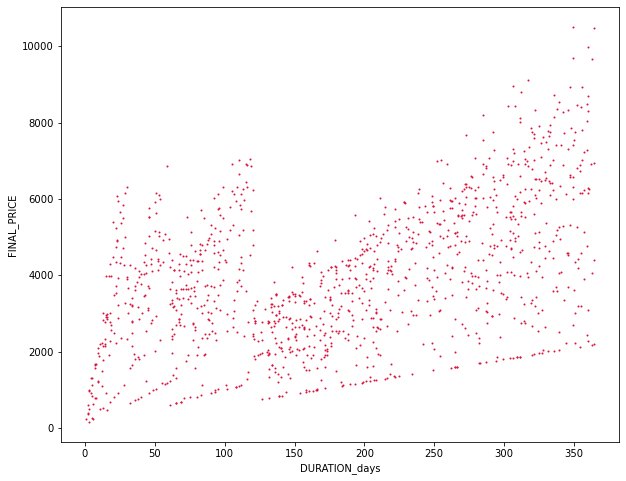

In [32]:
df.plot(kind='scatter', x='DURATION_days', y='FINAL_PRICE', s=1, c='crimson', figsize=(10, 8))

### Price by Acreage

<AxesSubplot:xlabel='ACREAGE', ylabel='FINAL_PRICE'>

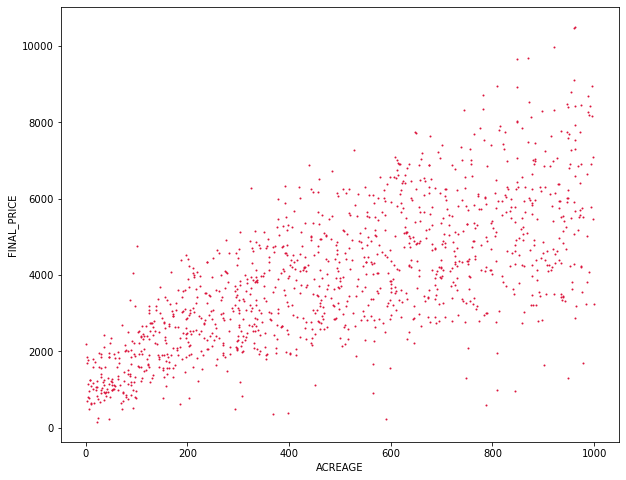

In [33]:
df.plot(kind='scatter', x='ACREAGE', y='FINAL_PRICE', s=1, c='crimson', figsize=(10, 8))

In [ ]:
df[df['FINAL_PRICE'].isnull()].shape

(0, 9)

In [28]:
df.sort_values(by = 'FINAL_PRICE', ascending = True).head(30)

,ACTIVITY_TYPE,BASE_STATE_PRC_HUNTING,BASE_STATE_PRC_HUNTING_OVER_100_ACRES,STATE,ACREAGE,DURATION_days,DAILY_PRICE_BASE,TOTAL_ANNUAL_PRICE,FINAL_PRICE
4878,HUNTING,10.0,22.0,Hawaii,473,1,11.458635,4182.401941,209.120097
8060,HUNTING,29.0,29.0,Missouri,67,3,4.226799,1542.781579,231.417237
4263,HUNTING,10.0,22.0,Utah,692,1,13.859749,5058.808555,252.940428
9277,HUNTING,29.0,29.0,Missouri,660,1,15.540392,5672.242943,283.612147
5325,HUNTING,10.0,22.0,Connecticut,880,1,15.629449,5704.748899,285.237445
8593,HUNTING,10.0,22.0,Wyoming,966,1,16.375361,5977.006943,298.850347
6755,HUNTING,10.0,22.0,Rhode Island,489,2,11.650827,4252.551940,425.255194
1508,HUNTING,10.0,22.0,Florida,62,12,2.739726,1000.000000,456.000000
3251,HUNTING,10.0,22.0,Alabama,633,2,13.255746,4838.347445,483.834745
1240,HUNTING,15.0,27.0,Georgia,125,5,6.525712,2381.884758,595.471189
